In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data_pd = pd.read_csv('/Users/mniharika/Downloads/final_df_new.csv')
data_pd = data_pd.fillna(0)

data_pd = pd.get_dummies(data_pd, columns=['Pos'])
data_pd = pd.get_dummies(data_pd, columns=['League'])

train_df, test_df = train_test_split(data_pd, test_size=0.25)

dropped_columns = ['Unnamed: 0', 'Player', 'Nation', 'Squad', '90s', 'Market Value']

In [3]:
train_df

,Unnamed: 0,Player,Nation,Squad,Age,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,...,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,Market Value,Pos_DF,Pos_FW,Pos_MF,League_EPL,League_La Liga
280,280,Harry Maguire,ENG,Manchester Utd,30.0,18.4,2,20,3,0.150,...,78,69,19,0.784,18000000.0,True,False,False,True,False
600,600,Jadon Sancho,ENG,Manchester Utd,23.0,0.9,0,0,0,0.000,...,10,0,3,0.000,30000000.0,False,True,False,True,False
151,151,Boubakary Soumaré,FRA,Sevilla,24.0,25.4,0,1,0,0.000,...,148,20,11,0.645,14000000.0,False,False,True,False,True
205,205,Johan Mojica,COL,Osasuna,30.0,22.7,0,17,1,0.059,...,168,15,14,0.517,2200000.0,True,False,False,False,True
453,453,Unai Gómez,ESP,Athletic Club,20.0,9.7,2,16,7,0.438,...,45,13,15,0.464,6000000.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,José María Giménez,URU,Atlético Madrid,28.0,14.7,0,7,1,0.143,...,49,31,18,0.633,22000000.0,True,False,False,False,True
606,606,Romain Faivre,FRA,Bournemouth,25.0,0.5,0,2,0,0.000,...,1,0,1,0.000,10000000.0,False,False,True,True,False
178,178,Takefusa Kubo,JPN,Real Sociedad,22.0,23.9,7,46,21,0.457,...,98,11,16,0.407,50000000.0,False,True,False,False,True
452,452,Juanmi,ESP,Cádiz,30.0,9.7,3,14,7,0.500,...,39,8,25,0.242,6000000.0,False,True,False,False,True


In [7]:
data_pd['CountryESP'] = (data_pd['Nation'] == 'ESP').astype(int)
data_pd['CountryENG'] = (data_pd['Nation'] == 'ENG').astype(int)
data_pd['CountryOther'] = ((data_pd['Nation'] != 'ESP') & (data_pd['Nation'] != 'ENG')).astype(int)

In [9]:
from collections import Counter
Counter(data_pd['Nation']).most_common()[0:2]

[('ESP', 179), ('ENG', 112)]

In [11]:
train_df_dropped_cols = train_df.drop(dropped_columns, axis=1)
train_arr = train_df_dropped_cols.to_numpy()
test_df_dropped_cols = test_df.drop(dropped_columns, axis=1)
test_arr = test_df_dropped_cols.to_numpy()

train_features_sc = StandardScaler()
train_features_norm = train_features_sc.fit_transform(train_arr)
#data2 = data.copy()
test_features_norm = train_features_sc.transform(test_arr)

train_mktval = train_df['Market Value'].to_numpy().reshape(-1, 1)
test_mktval = test_df['Market Value'].to_numpy().reshape(-1, 1)
train_mktval_sc = StandardScaler()
train_mktval_norm = train_mktval_sc.fit_transform(train_mktval)
test_mktval_norm = train_mktval_sc.transform(test_mktval)

#(train_features_norm, test_features_norm, train_mktval_norm, test_mktval_norm)

In [13]:
num_components = 25

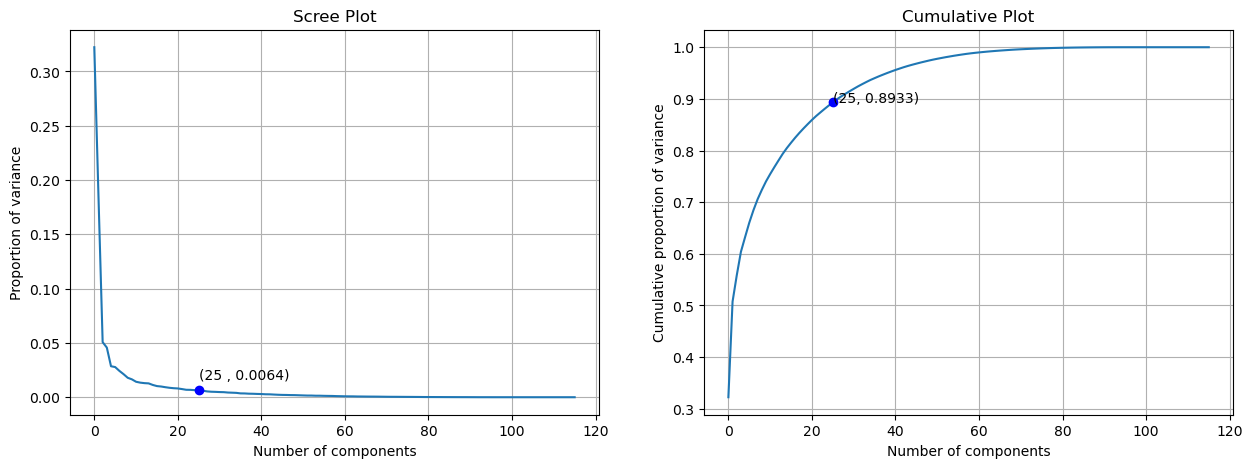

In [15]:
pca = PCA()
pca.fit(train_features_norm)
fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs[0].plot(pca.explained_variance_ratio_[:])
# scree plot
axs[0].set_title('Scree Plot')
axs[0].set_xlabel('Number of components')
axs[0].set_ylabel('Proportion of variance')
axs[0].text(num_components,
            pca.explained_variance_ratio_[num_components]+0.01,
            f'({num_components} , {pca.explained_variance_ratio_[num_components]:.4f})')
axs[0].plot(num_components, pca.explained_variance_ratio_[num_components], 'bo')
axs[0].grid(True)

c_sum = np.cumsum(pca.explained_variance_ratio_)
axs[1].plot(c_sum)
axs[1].set_title('Cumulative Plot')
axs[1].set_xlabel('Number of components')
axs[1].set_ylabel('Cumulative proportion of variance')
axs[1].text(num_components, c_sum[num_components], f'({num_components}, {c_sum[num_components]:.4f})')
axs[1].plot(num_components, c_sum[num_components], 'bo')
axs[1].grid(True)


In [17]:
for i in range(5):
    sorted_pca = np.argsort(pca.components_[i])[-5:][::-1]
    cols_upper = []
    for a1 in sorted_pca:
        cols_upper.append(train_df_dropped_cols.columns[a1])
    print(cols_upper)

    sorted_pca = np.argsort(pca.components_[i])[:5]
    cols_lower = []
    for a1 in sorted_pca:
        cols_lower.append(train_df_dropped_cols.columns[a1])
    print(cols_lower)
    print()

['Carries_TotDist', 'Touches_Touches', 'Touches_Live', 'Receiving_Rec', 'Carries_Carries']
['Pos_DF', 'League_La Liga', 'Take-Ons_Tkld%', 'Pos_FW', 'Standard_Sh/90']

['Touches_Def 3rd', 'Touches_Def Pen', 'Clr', 'Blocks_Sh', 'Total_PrgDist']
['Standard_SoT/90', 'Pos_FW', 'Standard_SoT', 'Carries_CPA', 'Touches_Att Pen']

['Aerial Duels_Won', 'Aerial Duels_Lost', 'Expected_npxG/Sh', 'Standard_G/Sh', 'Standard_G/SoT']
['Pos_MF', 'Performance_Crs', 'SCA Types_PassDead', 'Standard_Dist', 'GCA Types_PassDead']

['Tackles_Tkl', 'Performance_Fls', 'Performance_TklW', 'Tackles_TklW', 'Tackles_Mid 3rd']
['Total_Cmp%', 'Standard_FK', 'Medium_Cmp', 'Total_TotDist', 'Medium_Cmp%']

['Total_Cmp%', 'Short_Cmp%', 'Medium_Cmp%', 'Take-Ons_Succ', 'Carries_PrgC']
['SCA Types_PassDead', 'Standard_FK', 'Standard_PKatt', 'Standard_PK', 'Aerial Duels_Lost']



Text(0, 0.5, 'r2 score')

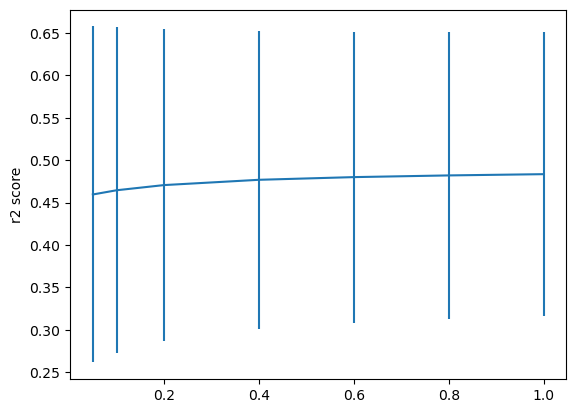

In [19]:
reg = Ridge(random_state=123, max_iter=100)
alpha_vals = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
grid_search = GridSearchCV(reg, param_grid={'alpha':alpha_vals},cv=5)
cv = grid_search.fit(train_features_norm, train_mktval_norm)
results_pd = pd.DataFrame(cv.cv_results_)
scores = results_pd['mean_test_score']
scores_std = results_pd['std_test_score']
plt.errorbar(alpha_vals, scores, scores_std)
plt.ylabel('r2 score')

<1x116 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

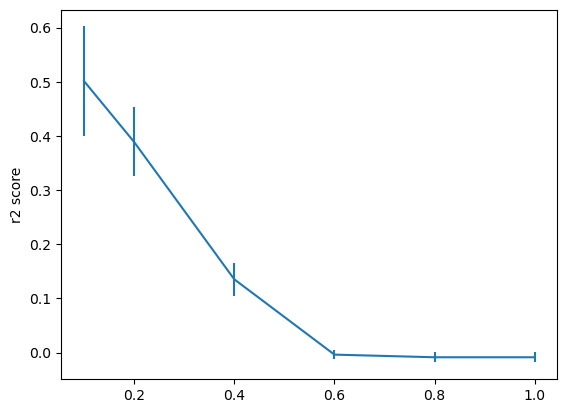

In [21]:
reg = Lasso(random_state=123, max_iter=100)
alpha_vals = [0.1, 0.2, 0.4, 0.6, 0.8, 1]
grid_search = GridSearchCV(reg, param_grid={'alpha':alpha_vals},cv=5)
cv = grid_search.fit(train_features_norm, train_mktval_norm)
results_pd = pd.DataFrame(cv.cv_results_)
scores = results_pd['mean_test_score']
scores_std = results_pd['std_test_score']
plt.errorbar(alpha_vals, scores, scores_std)
plt.ylabel('r2 score')
best_model = cv.best_estimator_
best_model.sparse_coef_

In [23]:
for i in range(len(train_df_dropped_cols.columns)):
    if best_model.coef_[i]!=0:
        print(train_df_dropped_cols.columns[i], best_model.coef_[i])

Age -0.2239335690160612
Standard_Gls 0.19562497922306968
Expected_G-xG 0.017684258361558337
Total_Cmp% 0.052738679309690784
Short_Cmp 0.048410606993174655
Long_Cmp% 0.022004231937998043
PPA 0.000949175222603201
GCA_GCA 0.0075962097366934255
GCA Types_PassLive 0.07363813260087979
Touches_Att 3rd 0.11233482541333566
Carries_PrgDist 0.15423064595774913
Carries_CPA 0.058621031319198644
League_EPL 0.14290197909404478
League_La Liga -2.6129636089242398e-15


In [25]:
test_score = best_model.score(test_features_norm, test_mktval_norm)
print(test_score)

0.4281029817558497


In [27]:
train_df_dropped_cols.columns

Index(['Age', 'Standard_Gls', 'Standard_Sh', 'Standard_SoT', 'Standard_SoT%',
       'Standard_Sh/90', 'Standard_SoT/90', 'Standard_G/Sh', 'Standard_G/SoT',
       'Standard_Dist',
       ...
       'Performance_OG', 'Performance_Recov', 'Aerial Duels_Won',
       'Aerial Duels_Lost', 'Aerial Duels_Won%', 'Pos_DF', 'Pos_FW', 'Pos_MF',
       'League_EPL', 'League_La Liga'],
      dtype='object', length=116)

In [ ]:
transformed_features_train = pca.transform(train_features_norm)[:,:num_components]
transformed_features_test = pca.transform(test_features_norm)[:,:num_components]

In [ ]:
transformed_features_test.shape

In [ ]:
reg = Lasso(random_state=123, max_iter=100)
alpha_vals = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
grid_search = GridSearchCV(reg, param_grid={'alpha':alpha_vals},cv=5)
cv = grid_search.fit(transformed_features_train, train_mktval_norm)
results_pd = pd.DataFrame(cv.cv_results_)
scores = results_pd['mean_test_score']
scores_std = results_pd['std_test_score']
plt.errorbar(alpha_vals, scores, scores_std)
plt.ylabel('r2 score')
best_model = cv.best_estimator_
best_model.sparse_coef_

In [ ]:
reg = Ridge(random_state=123, max_iter=100)
alpha_vals = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
grid_search = GridSearchCV(reg, param_grid={'alpha':alpha_vals},cv=5)
cv = grid_search.fit(transformed_features_train, train_mktval_norm)
results_pd = pd.DataFrame(cv.cv_results_)
scores = results_pd['mean_test_score']
scores_std = results_pd['std_test_score']
plt.errorbar(alpha_vals, scores, scores_std)
plt.ylabel('r2 score')

In [ ]:
out = best_model.predict(transformed_features_test)
print(root_mean_squared_error(test_mktval_norm, out))
out = best_model.predict(transformed_features_train)
print(root_mean_squared_error(train_mktval_norm, out))

In [29]:
# Save the trained model 
from joblib import dump,load

dump(best_model, 'lasso_model.joblib')
print("Model saved successfully.")

Model saved successfully.


In [31]:
loaded_model = load('lasso_model.joblib')
print("Model loaded successfully.")

Model loaded successfully.


**Recommeder Function**

To test our recommender function, we are generating synthetic data that closely mimics the original dataset scraped from Fbref. This synthetic dataset represents a scenario where a club is seeking to identify young, emerging talents (aged 15–21) within their budget. By applying our prediction model to this dataset, we can estimate the market values of these young players and optimize the player selection process based on the specific preferences and constraints of the client.

In [33]:
#building synthetic data
num_players = 200

data = {
    'Player': [f"Player_{i+1}" for i in range(num_players)],  
    'Nation': np.random.choice(['ENG', 'USA', 'CIV', 'MAR', 'FRA', 'NGA', 'ALG', 'NOR', 'SUI',
           'NED', 'PAR', 'MEX', 'DEN', 'JAM', 'BRA', 'TOG', 'GHA', 'CMR',
           'ARG', 'URU', 'GNB', 'MLI', 'NIR', 'ALB', 'ECU', 'SCO', 'ITA',
           'POL', 'BEL', 'IRL', 'CZE', 'ESP', 'GER', 'POR', 'WAL', 'COL',
           'ROU', 'SWE', 'JPN', 'SEN', 'AUT', 'HUN', 'GAB', 'SRB', 'GRE',
           'UKR', 'BFA', 'EGY', 'TUR', 'COD', 'NZL', 'VEN', 'SUR', 'CRO',
           'EQG', 'GUI', 'DOM', 'CAN', 'MOZ', 'KVX', 'ANG', 'PER', 'SVK',
           'RUS'], num_players),
    'Pos': np.random.choice(['FW', 'MF', 'DF'], num_players),
    'Age': np.random.randint(15, 21, num_players),
    'League': np.random.choice(['EPL', 'La Liga'], num_players)
}

df_synthetic = pd.DataFrame(data)


for idx, row in df_synthetic.iterrows():
    if row['Pos'] == 'FW':
        # Forwards - High attacking, low defensive
        df_synthetic.at[idx, 'Standard_Gls'] = np.random.uniform(15, 27)
        df_synthetic.at[idx, 'Standard_SoT'] = np.random.uniform(30, 50)
        df_synthetic.at[idx, 'Expected_xG'] = np.random.uniform(15, 29.2)
        df_synthetic.at[idx, 'Tackles_Att 3rd'] = np.random.uniform(0, 5)
        df_synthetic.at[idx, 'Performance_Fls'] = np.random.uniform(20, 50)
        df_synthetic.at[idx, 'Aerial Duels_Lost'] = np.random.uniform(0, 20)
    elif row['Pos'] == 'MF':
        # Midfielders - Balanced metrics
        df_synthetic.at[idx, 'Standard_Gls'] = np.random.uniform(5, 15)
        df_synthetic.at[idx, 'Standard_SoT'] = np.random.uniform(15, 30)
        df_synthetic.at[idx, 'Expected_xG'] = np.random.uniform(5, 15)
        df_synthetic.at[idx, 'Tackles_Att 3rd'] = np.random.uniform(5, 15)
        df_synthetic.at[idx, 'Performance_Fls'] = np.random.uniform(10, 30)
        df_synthetic.at[idx, 'Aerial Duels_Lost'] = np.random.uniform(10, 50)
    elif row['Pos'] == 'DF':
        # Defenders - High defensive, low attacking
        df_synthetic.at[idx, 'Standard_Gls'] = np.random.uniform(0, 5)
        df_synthetic.at[idx, 'Standard_SoT'] = np.random.uniform(0, 15)
        df_synthetic.at[idx, 'Expected_xG'] = np.random.uniform(0, 5)
        df_synthetic.at[idx, 'Tackles_Att 3rd'] = np.random.uniform(10, 23)
        df_synthetic.at[idx, 'Performance_Fls'] = np.random.uniform(5, 20)
        df_synthetic.at[idx, 'Aerial Duels_Lost'] = np.random.uniform(30, 144)


df_synthetic['Standard_Dist'] = np.random.uniform(2.8, 51.1, num_players)
df_synthetic['Expected_npxG'] = np.random.uniform(0, 22.9, num_players)
df_synthetic['Total_Cmp%'] = np.random.uniform(42.9, 100, num_players)
df_synthetic['Short_Cmp'] = np.random.uniform(0, 1676, num_players)
df_synthetic['Expected_A-xAG'] = np.random.uniform(-4.7, 5.7, num_players)
df_synthetic['PPA'] = np.random.uniform(0, 130, num_players)
df_synthetic['SCA_SCA90'] = np.random.uniform(0, 30, num_players)
df_synthetic['GCA Types_PassLive'] = np.random.uniform(0, 20, num_players)
df_synthetic['Carries_PrgDist'] = np.random.uniform(0, 6693, num_players)
df_synthetic['Carries_CPA'] = np.random.uniform(0, 102, num_players)
df_synthetic['Carries_Mis'] = np.random.uniform(0, 136, num_players)
df_synthetic['Performance_Off'] = np.random.uniform(0, 33, num_players)

df_synthetic

,Player,Nation,Pos,Age,League,Standard_Gls,Standard_SoT,Expected_xG,Tackles_Att 3rd,Performance_Fls,...,Total_Cmp%,Short_Cmp,Expected_A-xAG,PPA,SCA_SCA90,GCA Types_PassLive,Carries_PrgDist,Carries_CPA,Carries_Mis,Performance_Off
0,Player_1,MEX,FW,18,La Liga,18.754300,41.289793,23.162977,4.756346,31.951112,...,93.604661,960.476211,2.604246,68.490450,20.519125,6.059970,1503.614981,95.318327,73.722138,30.148768
1,Player_2,SUR,MF,18,La Liga,5.723440,22.395902,7.154257,11.776739,27.512185,...,55.111033,1548.798509,2.879278,93.789554,24.020750,6.542529,197.519567,8.265746,55.197854,16.314798
2,Player_3,SRB,DF,19,EPL,2.334552,1.555653,2.377552,13.811665,9.409640,...,57.001377,1313.195584,0.514006,72.704977,23.441231,10.741427,5469.026344,97.978702,99.628589,3.793167
3,Player_4,GER,DF,20,La Liga,3.189718,8.283769,4.553502,22.994528,6.273592,...,64.495064,568.903230,0.483354,40.288148,1.262049,4.060406,38.784153,49.801301,123.692593,24.367089
4,Player_5,COL,FW,18,La Liga,17.066547,45.462914,15.420347,2.545791,26.084532,...,60.659244,372.019335,2.456809,9.469800,18.865569,19.844085,2347.118971,37.387033,73.561971,1.341372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Player_196,ARG,FW,18,La Liga,23.228072,37.665611,17.203703,3.738530,32.128524,...,48.559772,429.828108,-1.783660,94.172574,8.272355,2.375748,1463.429732,56.365915,80.131956,26.639099
196,Player_197,ALG,DF,16,La Liga,0.690262,13.152330,1.254494,17.934043,14.939872,...,61.897355,1662.004728,-2.349170,38.238393,14.947470,11.581485,6280.126010,3.333321,6.817676,2.461825
197,Player_198,PER,FW,17,EPL,24.970798,39.013493,22.095403,0.263305,46.534964,...,93.463490,339.099554,3.440944,101.585301,24.923786,2.385869,2166.789828,78.413577,8.474695,30.447588
198,Player_199,UKR,MF,18,La Liga,12.155154,18.880859,11.668522,10.050352,19.364494,...,50.149979,30.317198,2.913600,46.243615,21.633349,16.987194,725.291879,5.517725,107.569992,26.496262


In [35]:
df_synthetic.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'League', 'Standard_Gls',
       'Standard_SoT', 'Expected_xG', 'Tackles_Att 3rd', 'Performance_Fls',
       'Aerial Duels_Lost', 'Standard_Dist', 'Expected_npxG', 'Total_Cmp%',
       'Short_Cmp', 'Expected_A-xAG', 'PPA', 'SCA_SCA90', 'GCA Types_PassLive',
       'Carries_PrgDist', 'Carries_CPA', 'Carries_Mis', 'Performance_Off'],
      dtype='object')

Here, we generated synthetic data points exclusively for the variables selected by the Lasso model. However, since the saved Lasso model requires all 116 variables as input, we added the remaining columns to the synthetic dataset and assigned a value of "zero" to each observation in these columns for simplicity.

In [37]:
columns_to_remove = ['Pos_DF', 'Pos_FW', 'Pos_MF', 'League_EPL', 'League_La Liga']

train_df_dropped_cols = train_df_dropped_cols.drop(columns=columns_to_remove, axis=1)

existing_columns_in_synthetic = set(df_synthetic.columns)

columns_to_add = [col for col in train_df_dropped_cols.columns if col not in existing_columns_in_synthetic]

for col in columns_to_add:
    df_synthetic[col] = 0

print("Columns in df_synthetic after processing:")
print(df_synthetic.columns)


Columns in df_synthetic after processing:
Index(['Player', 'Nation', 'Pos', 'Age', 'League', 'Standard_Gls',
       'Standard_SoT', 'Expected_xG', 'Tackles_Att 3rd', 'Performance_Fls',
       ...
       'Performance_Fld', 'Performance_Crs', 'Performance_Int',
       'Performance_TklW', 'Performance_PKwon', 'Performance_PKcon',
       'Performance_OG', 'Performance_Recov', 'Aerial Duels_Won',
       'Aerial Duels_Won%'],
      dtype='object', length=115)


In [39]:
df_synthetic.head()

,Player,Nation,Pos,Age,League,Standard_Gls,Standard_SoT,Expected_xG,Tackles_Att 3rd,Performance_Fls,...,Performance_Fld,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Won%
0,Player_1,MEX,FW,18,La Liga,18.754300,41.289793,23.162977,4.756346,31.951112,...,0,0,0,0,0,0,0,0,0,0
1,Player_2,SUR,MF,18,La Liga,5.723440,22.395902,7.154257,11.776739,27.512185,...,0,0,0,0,0,0,0,0,0,0
2,Player_3,SRB,DF,19,EPL,2.334552,1.555653,2.377552,13.811665,9.409640,...,0,0,0,0,0,0,0,0,0,0
3,Player_4,GER,DF,20,La Liga,3.189718,8.283769,4.553502,22.994528,6.273592,...,0,0,0,0,0,0,0,0,0,0
4,Player_5,COL,FW,18,La Liga,17.066547,45.462914,15.420347,2.545791,26.084532,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_synthetic.groupby('Pos').agg({'Player': 'count'})

,Player
Pos,
DF,75
FW,62
MF,63


In [41]:
#dummies for categories
df_synthetic_modelling = pd.get_dummies(df_synthetic, columns=['Pos'])
df_synthetic_modelling = pd.get_dummies(df_synthetic_modelling, columns=['League'])


In [43]:
df_synthetic_modelling.head()

,Player,Nation,Age,Standard_Gls,Standard_SoT,Expected_xG,Tackles_Att 3rd,Performance_Fls,Aerial Duels_Lost,Standard_Dist,...,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Won%,Pos_DF,Pos_FW,Pos_MF,League_EPL,League_La Liga
0,Player_1,MEX,18,18.754300,41.289793,23.162977,4.756346,31.951112,18.815484,29.628146,...,0,0,0,0,0,False,True,False,False,True
1,Player_2,SUR,18,5.723440,22.395902,7.154257,11.776739,27.512185,49.482642,36.462624,...,0,0,0,0,0,False,False,True,False,True
2,Player_3,SRB,19,2.334552,1.555653,2.377552,13.811665,9.409640,61.722020,18.366178,...,0,0,0,0,0,True,False,False,True,False
3,Player_4,GER,20,3.189718,8.283769,4.553502,22.994528,6.273592,117.232992,49.876731,...,0,0,0,0,0,True,False,False,False,True
4,Player_5,COL,18,17.066547,45.462914,15.420347,2.545791,26.084532,2.218427,27.365625,...,0,0,0,0,0,False,True,False,False,True


In [45]:
df_synthetic.head()

,Player,Nation,Pos,Age,League,Standard_Gls,Standard_SoT,Expected_xG,Tackles_Att 3rd,Performance_Fls,...,Performance_Fld,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Won%
0,Player_1,MEX,FW,18,La Liga,18.754300,41.289793,23.162977,4.756346,31.951112,...,0,0,0,0,0,0,0,0,0,0
1,Player_2,SUR,MF,18,La Liga,5.723440,22.395902,7.154257,11.776739,27.512185,...,0,0,0,0,0,0,0,0,0,0
2,Player_3,SRB,DF,19,EPL,2.334552,1.555653,2.377552,13.811665,9.409640,...,0,0,0,0,0,0,0,0,0,0
3,Player_4,GER,DF,20,La Liga,3.189718,8.283769,4.553502,22.994528,6.273592,...,0,0,0,0,0,0,0,0,0,0
4,Player_5,COL,FW,18,La Liga,17.066547,45.462914,15.420347,2.545791,26.084532,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dropped_columns = ['Player', 'Nation']  
df_synthetic_dropped_cols = df_synthetic_modelling.drop(dropped_columns, axis=1)
df_synthetic_dropped_cols.head()

,Age,Standard_Gls,Standard_SoT,Expected_xG,Tackles_Att 3rd,Performance_Fls,Aerial Duels_Lost,Standard_Dist,Expected_npxG,Total_Cmp%,...,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Won%,Pos_DF,Pos_FW,Pos_MF,League_EPL,League_La Liga
0,18,18.754300,41.289793,23.162977,4.756346,31.951112,18.815484,29.628146,4.997308,93.604661,...,0,0,0,0,0,False,True,False,False,True
1,18,5.723440,22.395902,7.154257,11.776739,27.512185,49.482642,36.462624,0.247209,55.111033,...,0,0,0,0,0,False,False,True,False,True
2,19,2.334552,1.555653,2.377552,13.811665,9.409640,61.722020,18.366178,4.673398,57.001377,...,0,0,0,0,0,True,False,False,True,False
3,20,3.189718,8.283769,4.553502,22.994528,6.273592,117.232992,49.876731,0.710159,64.495064,...,0,0,0,0,0,True,False,False,False,True
4,18,17.066547,45.462914,15.420347,2.545791,26.084532,2.218427,27.365625,6.241561,60.659244,...,0,0,0,0,0,False,True,False,False,True


In [49]:
synthetic_features = df_synthetic_dropped_cols.to_numpy()

synthetic_features_norm = train_features_sc.transform(synthetic_features)

synthetic_predictions = best_model.predict(synthetic_features_norm)

synthetic_predictions_original_scale = train_mktval_sc.inverse_transform(synthetic_predictions.reshape(-1, 1))

print("Predictions on df_synthetic (original scale):")
print(synthetic_predictions_original_scale)

Predictions on df_synthetic (original scale):
[[49219208.85356647]
 [ 8332513.42399481]
 [36064019.31578803]
 [14872618.13074486]
 [30306839.80184969]
 [37664262.44963279]
 [25196274.39896715]
 [11839126.73838066]
 [24875338.42431747]
 [ 8867115.2601079 ]
 [21463209.03124323]
 [45289209.81434152]
 [30861700.75462004]
 [50543175.34078385]
 [46302122.67033157]
 [20751647.32867806]
 [27765502.3975439 ]
 [60275741.08401996]
 [27534355.31772266]
 [27907916.3176023 ]
 [37248347.20939746]
 [23377399.03067164]
 [33349612.7445298 ]
 [34084612.55008826]
 [14397531.27587255]
 [30484104.34754574]
 [10835446.69908251]
 [23543080.5070261 ]
 [26019655.57427035]
 [25958118.5215514 ]
 [15285938.26995199]
 [36812511.10024428]
 [21198180.20551885]
 [44798496.63069601]
 [11704918.27525031]
 [27247739.36009726]
 [27511515.9108739 ]
 [36641257.52011827]
 [28139623.73067712]
 [20234673.42521871]
 [18180288.57180938]
 [35077838.4386996 ]
 [23715190.50765109]
 [25793039.36511269]
 [31480070.30095039]
 [4500768

In [51]:
df_synthetic['Predicted Market Value'] = synthetic_predictions_original_scale.flatten()

df_synthetic.head(10)

,Player,Nation,Pos,Age,League,Standard_Gls,Standard_SoT,Expected_xG,Tackles_Att 3rd,Performance_Fls,...,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Won%,Predicted Market Value
0,Player_1,MEX,FW,18,La Liga,18.754300,41.289793,23.162977,4.756346,31.951112,...,0,0,0,0,0,0,0,0,0,4.921921e+07
1,Player_2,SUR,MF,18,La Liga,5.723440,22.395902,7.154257,11.776739,27.512185,...,0,0,0,0,0,0,0,0,0,8.332513e+06
2,Player_3,SRB,DF,19,EPL,2.334552,1.555653,2.377552,13.811665,9.409640,...,0,0,0,0,0,0,0,0,0,3.606402e+07
3,Player_4,GER,DF,20,La Liga,3.189718,8.283769,4.553502,22.994528,6.273592,...,0,0,0,0,0,0,0,0,0,1.487262e+07
4,Player_5,COL,FW,18,La Liga,17.066547,45.462914,15.420347,2.545791,26.084532,...,0,0,0,0,0,0,0,0,0,3.030684e+07
5,Player_6,ITA,MF,16,EPL,6.094118,22.878077,9.721720,5.443350,27.421603,...,0,0,0,0,0,0,0,0,0,3.766426e+07
6,Player_7,ESP,DF,17,EPL,1.124314,14.147006,0.226552,20.182688,8.126666,...,0,0,0,0,0,0,0,0,0,2.519627e+07
7,Player_8,NOR,DF,20,La Liga,1.866860,13.894751,1.688798,19.261614,10.546652,...,0,0,0,0,0,0,0,0,0,1.183913e+07
8,Player_9,CMR,MF,18,EPL,11.158967,28.166196,11.196350,11.610455,26.073568,...,0,0,0,0,0,0,0,0,0,2.487534e+07
9,Player_10,NGA,DF,18,La Liga,4.446698,14.026800,1.176954,22.472905,11.726052,...,0,0,0,0,0,0,0,0,0,8.867115e+06


In [53]:
df_synthetic['Predicted Market Value'].max(),df_synthetic['Predicted Market Value'].min()

(62886318.377392665, 321187.8668445051)

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from itertools import combinations

In [74]:
def visualize_clusters(players, features_scaled, cluster_labels, position, selected_indices):
   
    from sklearn.decomposition import PCA
    
    # Applying PCA to reduce to 3 dimensions for visualization
    pca = PCA(n_components=3)
    features_pca = pca.fit_transform(features_scaled)
    
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot all points with cluster colors
    scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2],
                        c=cluster_labels, cmap='viridis', alpha=0.6)
    
    # Highlighting selected players in the plot
    if len(selected_indices) > 0:
        selected_points = features_pca[selected_indices]
        ax.scatter(selected_points[:, 0], selected_points[:, 1], selected_points[:, 2],
                  color='red', s=100, label='Selected Players', marker='*')
    
    ax.set_title(f'Cluster Visualization for {position}s')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.legend()
    plt.show()
    
def select_best_combination(players_df, budget, num_required):

    if len(players_df) < num_required:
        print(f"Warning: Not enough players available. Need {num_required}, but only have {len(players_df)}")
        return []
        
    players_list = players_df.reset_index(drop=True)
    
    def get_combinations(items, r):
        from itertools import combinations
        return combinations(range(len(items)), r)
        
    best_combination = []
    best_score = -float('inf')
    
    # First tries to fit in exact budget
    for combo in get_combinations(players_list, num_required):
        combo_players = players_list.iloc[list(combo)]
        total_cost = combo_players['Predicted Market Value'].sum()
        
        if total_cost <= budget:
            score = combo_players['value_score'].sum()
            if score > best_score:
                best_score = score
                best_combination = list(combo)
    
    
    if not best_combination:
        print(f"No exact combination found. Using greedy approach for {num_required} players within budget {budget}")
        available_players = players_list.copy()
        selected_indices = []
        remaining_budget = budget
        
        while len(selected_indices) < num_required and not available_players.empty:
            # Calculate value per cost for remaining budget
            available_players['temp_score'] = available_players['value_score'] / available_players['Predicted Market Value']
            best_player_idx = available_players[available_players['Predicted Market Value'] <= remaining_budget]['temp_score'].idxmax()
            
            if pd.isna(best_player_idx):
                break
                
            selected_indices.append(best_player_idx)
            remaining_budget -= available_players.loc[best_player_idx, 'Predicted Market Value']
            available_players = available_players.drop(best_player_idx)
        
        best_combination = selected_indices
    
    return best_combination


def cluster_and_recommend(players, num_players, position_name, position_budget):
    
    if players.shape[0] == 0:
        print(f"No players available for position {position_name}")
        return pd.DataFrame(), position_budget

    # Position-specific features
    position_features = {
        'FW': [
            'Standard_Gls','Standard_SoT','Standard_Dist','Expected_xG','Expected_npxG','Expected_A-xAG','PPA','SCA_SCA90',       
            'Carries_CPA','Carries_PrgDist'],
        'MF': ['Expected_A-xAG','PPA','SCA_SCA90','GCA Types_PassLive','Total_Cmp%','Short_Cmp', 'Carries_PrgDist','Carries_CPA'
               ,'Performance_Off','Performance_Fls'],
        'DF': ['Tackles_Att 3rd', 'Total_Cmp%','Short_Cmp','Carries_PrgDist','Carries_Mis','Performance_Fls','Aerial Duels_Lost','PPA',             # Passes into penalty area
            'Expected_A-xAG','Performance_Off']
    }
    
    features = players[position_features[position_name]]
    
 
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Clustering based on Position-specific metrics
    position_cluster_rules = {
        'FW': {'min_players_per_cluster': 15,'max_clusters': 3},
        'MF': {'min_players_per_cluster': 15,'max_clusters': 3},
        'DF': {'min_players_per_cluster': 15,'max_clusters': 3}
    }
    
    # Calculating optimal number of clusters
    rules = position_cluster_rules[position_name]
    n_players = len(players)
    max_possible_clusters = min(
        rules['max_clusters'],
        n_players // rules['min_players_per_cluster']
    )
    max_clusters = max(2, min(3, max_possible_clusters))
    
    #using silhouette analysis
    best_score = -1
    optimal_n_clusters = 2
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(features_scaled)
        
        # Only consider clustering if it results in reasonably sized clusters
        cluster_sizes = pd.Series(cluster_labels).value_counts()
        if cluster_sizes.min() >= rules['min_players_per_cluster']:
            silhouette_avg = silhouette_score(features_scaled, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                optimal_n_clusters = n_clusters
    
    # Applying k-means 
    kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    players['Cluster'] = cluster_labels
    
    
    cluster_sizes = pd.Series(cluster_labels).value_counts()
    print(f"\nCluster sizes for {position_name}:")
    for cluster, size in cluster_sizes.items():
        print(f"Cluster {cluster}: {size} players")
    
    # Feature importance weights for value score calculation
    feature_weights = {
        'FW': {'Standard_Gls':2.0, 'Expected_xG': 1.5,'Standard_SoT': 1.5,'Carries_CPA': 1.2,'Expected_A-xAG': 1.0 },
        'MF': {'Expected_A-xAG': 2.0,'SCA_SCA90': 1.5,'Total_Cmp%': 1.5,'PPA': 1.2,'Carries_PrgDist': 1.0 },
        'DF': {'Tackles_Att 3rd': 2.0,'Total_Cmp%': 1.5,'Aerial Duels_Lost': -1.5,'Performance_Fls': -1.2,'Carries_Mis': -1.0}
    }
    
    # Calculate weighted value scores
    for feature in position_features[position_name]:
        weight = feature_weights[position_name].get(feature, 1.0)
        if feature in ['Aerial Duels_Lost', 'Performance_Fls', 'Carries_Mis', 'Performance_Off']:
            players[f'{feature}_score'] = -weight * players[feature] / players['Predicted Market Value']
        else:
            players[f'{feature}_score'] = weight * players[feature] / players['Predicted Market Value']
    
    players['value_score'] = players[[f'{feature}_score' for feature in position_features[position_name]]].mean(axis=1)
    
    # Select players from clusters
    players_per_cluster = max(1, num_players // optimal_n_clusters)
    remaining_budget = position_budget
    final_selected_indices = []
    
    #try to get minimum players from each cluster
    for cluster in range(optimal_n_clusters):
        cluster_players = players[players['Cluster'] == cluster].copy()
        cluster_players = cluster_players.sort_values('value_score', ascending=False)
        
        selected_from_cluster = select_best_combination(
            cluster_players,
            remaining_budget,
            min(players_per_cluster, len(cluster_players))
        )
        
        if selected_from_cluster:
            cluster_indices = cluster_players.index[selected_from_cluster]
            final_selected_indices.extend(cluster_indices)
            remaining_budget -= players.loc[cluster_indices, 'Predicted Market Value'].sum()
    
    # fill remaining spots with best available players
    remaining_spots = num_players - len(final_selected_indices)
    if remaining_spots > 0:
        remaining_players = players[~players.index.isin(final_selected_indices)].copy()
        remaining_players = remaining_players.sort_values('value_score', ascending=False)
        
        additional_selected = select_best_combination(
            remaining_players,
            remaining_budget,
            remaining_spots
        )
        
        if additional_selected:
            final_selected_indices.extend(remaining_players.index[additional_selected])
            remaining_budget -= remaining_players.iloc[additional_selected]['Predicted Market Value'].sum()
    
    # Visualizing clusters
    visualize_clusters(players, features_scaled, cluster_labels, position_name, 
                     [list(players.index).index(idx) for idx in final_selected_indices])
    
    selected_players = players.loc[final_selected_indices].copy()
    
    if len(selected_players) < num_players:
        print(f"Warning: Could only select {len(selected_players)} {position_name} players instead of {num_players}")
    
    return selected_players, remaining_budget

def recommend_players_with_kmeans(player_data, total_budget, num_forwards=4, num_midfielders=3, num_defenders=3):

    # Allocate budget proportionally
    total_players = num_forwards + num_midfielders + num_defenders
    position_budgets = {
        'FW': (total_budget * num_forwards) / total_players,
        'MF': (total_budget * num_midfielders) / total_players,
        'DF': (total_budget * num_defenders) / total_players
    }

    # Get recommendations for each position
    recommended_forwards, remaining_fw_budget = cluster_and_recommend(
        player_data[player_data['Pos'] == 'FW'], num_forwards, 'FW', position_budgets['FW'])
    
    # Add remaining budget from FW to MF
    position_budgets['MF'] += remaining_fw_budget
    recommended_midfielders, remaining_mf_budget = cluster_and_recommend(
        player_data[player_data['Pos'] == 'MF'], num_midfielders, 'MF', position_budgets['MF'])
    
    # Add remaining budget from MF to DF
    position_budgets['DF'] += remaining_mf_budget
    recommended_defenders, remaining_budget = cluster_and_recommend(
        player_data[player_data['Pos'] == 'DF'], num_defenders, 'DF', position_budgets['DF'])
    

    recommendations = pd.concat([recommended_forwards, recommended_midfielders, recommended_defenders])
    

    total_cost = recommendations['Predicted Market Value'].sum()
    print(f"\nTotal Cost: {total_cost:,.2f}")
    print(f"Remaining Budget: {total_budget - total_cost:,.2f}")
    
    for pos in ['FW', 'MF', 'DF']:
        pos_players = recommendations[recommendations['Pos'] == pos]
        print(f"\n{pos} Players Selected: {len(pos_players)}")
        print(f"{pos} Total Cost: {pos_players['Predicted Market Value'].sum():,.2f}")
    
    return recommendations[['Player', 'Pos', 'Age', 'Predicted Market Value', 'Cluster', 'value_score']]


Cluster sizes for FW:
Cluster 1: 34 players
Cluster 0: 28 players


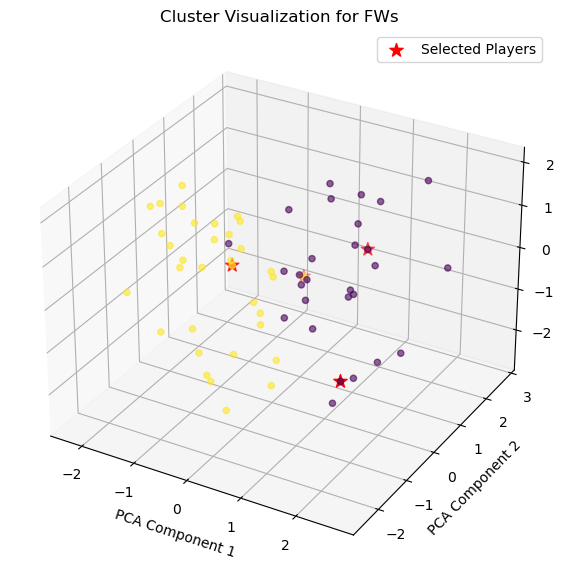


Cluster sizes for MF:
Cluster 0: 35 players
Cluster 1: 28 players


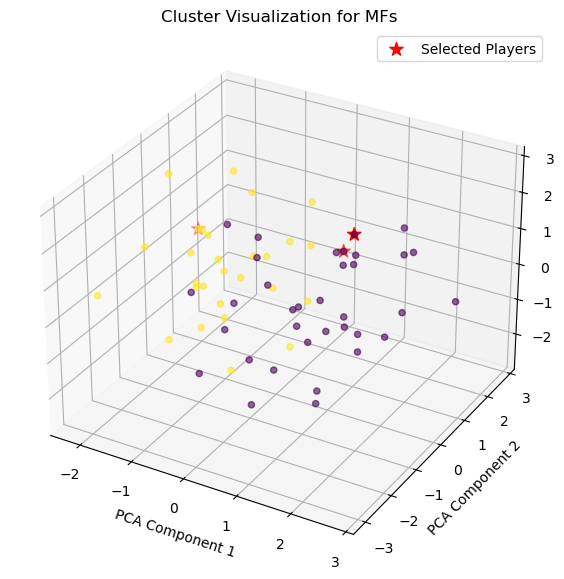


Cluster sizes for DF:
Cluster 1: 43 players
Cluster 0: 32 players


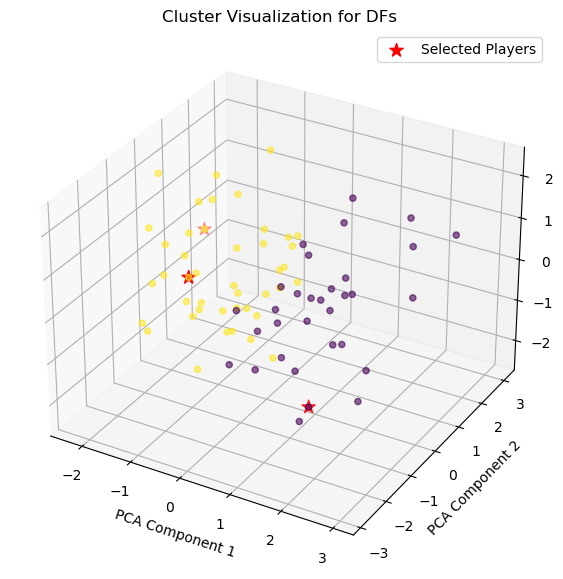


Total Cost: 166,140,825.00
Remaining Budget: 183,859,175.00

FW Players Selected: 4
FW Total Cost: 113,124,403.94

MF Players Selected: 3
MF Total Cost: 47,062,513.23

DF Players Selected: 3
DF Total Cost: 5,953,907.83


In [76]:
#For a budget of EUR 350M
recommendations = recommend_players_with_kmeans(
    player_data=df_synthetic,
    total_budget= 350000000 
)


In [78]:
recommendations

,Player,Pos,Age,Predicted Market Value,Cluster,value_score
172,Player_173,FW,18,2.888876e+07,0,0.000022
134,Player_135,FW,16,3.070000e+07,0,0.000017
58,Player_59,FW,19,2.842677e+07,1,0.000021
103,Player_104,FW,19,2.510887e+07,1,0.000017
180,Player_181,MF,20,1.294728e+07,0,0.000040
136,Player_137,MF,20,1.873060e+07,1,0.000036
81,Player_82,MF,20,1.538463e+07,0,0.000040
93,Player_94,DF,20,3.211879e+05,0,0.000251
196,Player_197,DF,16,3.485900e+06,1,0.000236
70,Player_71,DF,19,2.146820e+06,1,0.000185
